# NETWORK INTRUSION DETECTION

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Modules related key techniques of supervised learning
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor,AdaBoostRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Reading the data

In [2]:
back = pd.read_csv("Data_of_Attack_Back.csv")

In [3]:
back.columns = [col.strip() for col in back.columns]

In [4]:
back.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0


In [5]:
back['attack_name'] = 'back'

In [6]:
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     968 non-null    float64
 1   protocol_type                968 non-null    int64  
 2   service                      968 non-null    int64  
 3   flag                         968 non-null    float64
 4   src_bytes                    968 non-null    float64
 5   dst_bytes                    968 non-null    float64
 6   land                         968 non-null    int64  
 7   wrong_fragment               968 non-null    int64  
 8   urgent                       968 non-null    int64  
 9   hot                          968 non-null    float64
 10  num_failed_logins            968 non-null    int64  
 11  logged_in                    968 non-null    float64
 12  num_compromised              968 non-null    float64
 13  root_shell          

In [7]:
buffer_overflow = pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")

In [8]:
buffer_overflow.columns = [col.strip() for col in buffer_overflow.columns]

In [9]:
buffer_overflow.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,...,0.002,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0


In [10]:
buffer_overflow['attack_name'] = 'buffer_overflow'

In [11]:
FTPWrite = pd.read_csv("Data_of_Attack_Back_FTPWrite.csv", header = None, names = back.columns)

In [12]:
FTPWrite.columns = [col.strip() for col in FTPWrite.columns]

In [13]:
FTPWrite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     8 non-null      float64
 1   protocol_type                8 non-null      int64  
 2   service                      8 non-null      float64
 3   flag                         8 non-null      int64  
 4   src_bytes                    8 non-null      float64
 5   dst_bytes                    8 non-null      float64
 6   land                         8 non-null      int64  
 7   wrong_fragment               8 non-null      int64  
 8   urgent                       8 non-null      float64
 9   hot                          8 non-null      float64
 10  num_failed_logins            8 non-null      int64  
 11  logged_in                    8 non-null      float64
 12  num_compromised              8 non-null      float64
 13  root_shell              

In [14]:
FTPWrite['attack_name'] = 'FTPWrite'

In [15]:
guesspwd = pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")

In [16]:
guesspwd.columns = [col.strip() for col in guesspwd.columns]

In [17]:
guesspwd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.001,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.002,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.003,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.004,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075


In [18]:
guesspwd['attack_name'] = 'guesspwd'

In [19]:
neptune = pd.read_csv("Data_of_Attack_Back_Neptune.csv")

In [20]:
neptune.columns = [col.strip() for col in neptune.columns]

In [21]:
neptune.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.001,0.002,0.1,0.0,0.100,0.100,0.1,0.050,0.0,0.0
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.002,0.003,0.1,0.0,0.050,0.067,0.1,0.067,0.0,0.0
2,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.003,0.004,0.1,0.0,0.033,0.050,0.1,0.075,0.0,0.0
3,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.004,0.005,0.1,0.0,0.025,0.040,0.1,0.080,0.0,0.0
4,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.005,0.006,0.1,0.0,0.020,0.033,0.1,0.083,0.0,0.0


In [22]:
neptune['attack_name'] = 'neptune'

In [23]:
Nmap = pd.read_csv("Data_of_Attack_Back_NMap.csv")

In [24]:
Nmap.columns = [col.strip() for col in Nmap.columns]

In [25]:
Nmap.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.005,0.003,0.060,0.060,0.060,0.0,0.0,0.0,0,0
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.006,0.004,0.067,0.050,0.067,0.0,0.0,0.0,0,0
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.007,0.005,0.071,0.043,0.071,0.0,0.0,0.0,0,0


In [26]:
Nmap['attack_name'] = 'Nmap'

In [27]:
normal = pd.read_csv("Data_of_Attack_Back_Normal.csv")

In [28]:
normal.columns = [col.strip() for col in normal.columns]

In [29]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0


In [30]:
normal['attack_name'] = 'normal'

In [31]:
portsweep = pd.read_csv("Data_of_Attack_Back_PortSweep.csv")

In [32]:
portsweep.columns = [col.strip() for col in portsweep.columns]

In [33]:
portsweep.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.173,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.174,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.175,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100


In [34]:
portsweep['attack_name'] = 'portsweep'

In [35]:
rootkit = pd.read_csv("Data_of_Attack_Back_RootKit.csv")

In [36]:
rootkit.columns = [col.strip() for col in rootkit.columns]

In [37]:
rootkit.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0060,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
1,0.0060,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
2,0.0708,0.0,0.05,0,0.01727,0.24080,0,0,0.0,0.0,...,0.255,0.003,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
3,0.0021,0.0,0.07,0,0.00089,0.00345,0,0,0.0,0.1,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
4,0.0098,0.0,0.05,0,0.00621,0.08356,0,0,0.1,0.1,...,0.255,0.004,0.002,0.002,0.0,0.0,0,0.0,0.0,0.0


In [38]:
rootkit['attack_name'] = 'rootkit'

In [39]:
satan = pd.read_csv("Data_of_Attack_Back_Satan.csv")

In [40]:
satan.columns = [col.strip() for col in satan.columns]

In [41]:
satan.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0
2,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.145,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0
3,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.146,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0
4,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.147,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0


In [42]:
satan['attack_name'] = 'satan'

In [43]:
smurf = pd.read_csv("Data_of_Attack_Back_Smurf.csv")

In [44]:
smurf.columns = [col.strip() for col in smurf.columns]

In [45]:
smurf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.148,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.149,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.150,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0


In [46]:
smurf['attack_name'] = 'smurf'

In [47]:
dfs = [back, buffer_overflow, FTPWrite, guesspwd, neptune, Nmap, normal, portsweep, rootkit, satan, smurf]

In [48]:
combined_df = pd.concat(dfs, axis=0, ignore_index=True)

In [49]:
combined_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_name
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,back
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,back
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,back
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,back
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,back


In [50]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13 

In [51]:
combined_df.isna().sum().sum()

0

In [52]:
## Now, splitting the data for better clarity and to perform actions

In [53]:
combined_df_continuous = combined_df.loc[:,((combined_df.dtypes=='int64')|(combined_df.dtypes=='float64')|(combined_df.dtypes=='int32')|(combined_df.dtypes=='float32'))]
combined_df_catagorical = combined_df.loc[:,( combined_df.dtypes=='object')]

In [54]:
combined_df_continuous.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0


In [55]:
combined_df_catagorical.head()

,attack_name
0,back
1,back
2,back
3,back
4,back


In [56]:
combined_df_continuous.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [57]:
combined_df_catagorical.columns

Index(['attack_name'], dtype='object')

In [58]:
combined_df_continuous.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,817551.0,8.768073e-04,0.026636,0.0,0.000,0.00000,0.00000,1.000
protocol_type,817551.0,5.696036e-04,0.002596,0.0,0.000,0.00000,0.00000,0.020
service,817551.0,5.290875e-02,0.096389,0.0,0.000,0.00000,0.12000,0.670
flag,817551.0,2.015960e-02,0.030959,0.0,0.000,0.00000,0.07000,0.100
src_bytes,817551.0,4.961384e-03,0.033235,0.0,0.000,0.00217,0.00299,1.000
dst_bytes,817551.0,2.486210e-02,0.066635,0.0,0.000,0.00367,0.01969,1.000
land,817551.0,0.000000e+00,0.000000,0.0,0.000,0.00000,0.00000,0.000
wrong_fragment,817551.0,3.669496e-07,0.000332,0.0,0.000,0.00000,0.00000,0.300
urgent,817551.0,2.568647e-06,0.000805,0.0,0.000,0.00000,0.00000,0.500
hot,817551.0,2.455749e-03,0.041470,0.0,0.000,0.00000,0.00000,1.000


In [59]:
combined_df_catagorical.describe(include = 'object')

,attack_name
count,817551
unique,11
top,normal
freq,576710


<AxesSubplot:>

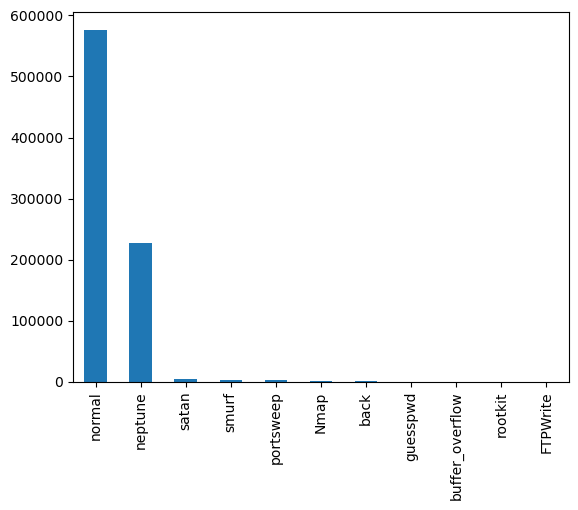

In [60]:
combined_df.attack_name.value_counts().plot(kind = 'bar')

In [61]:
## Defining the target variable
combined_df_catagorical.attack_name.unique()

array(['back', 'buffer_overflow', 'FTPWrite', 'guesspwd', 'neptune',
       'Nmap', 'normal', 'portsweep', 'rootkit', 'satan', 'smurf'],
      dtype=object)

In [62]:
combined_df_catagorical['Activity'] = np.where((combined_df.attack_name.isin (['back', 'buffer_overflow', 'FTPWrite', 'guesspwd', 'neptune',
       'Nmap', 'portsweep', 'rootkit', 'satan', 'smurf'])==True), 1, 0 )

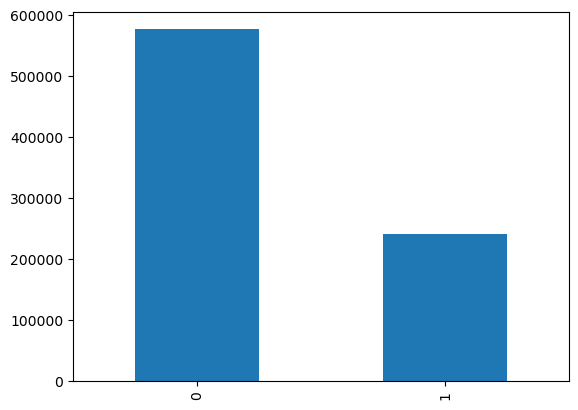

In [63]:
combined_df_catagorical.Activity.value_counts().plot(kind = 'bar')
plt.show()

## It is cleared from above bar chart that this is imbalanced class and later we will do the resampling to resolve this problem.

## checking outliers from Boxplots

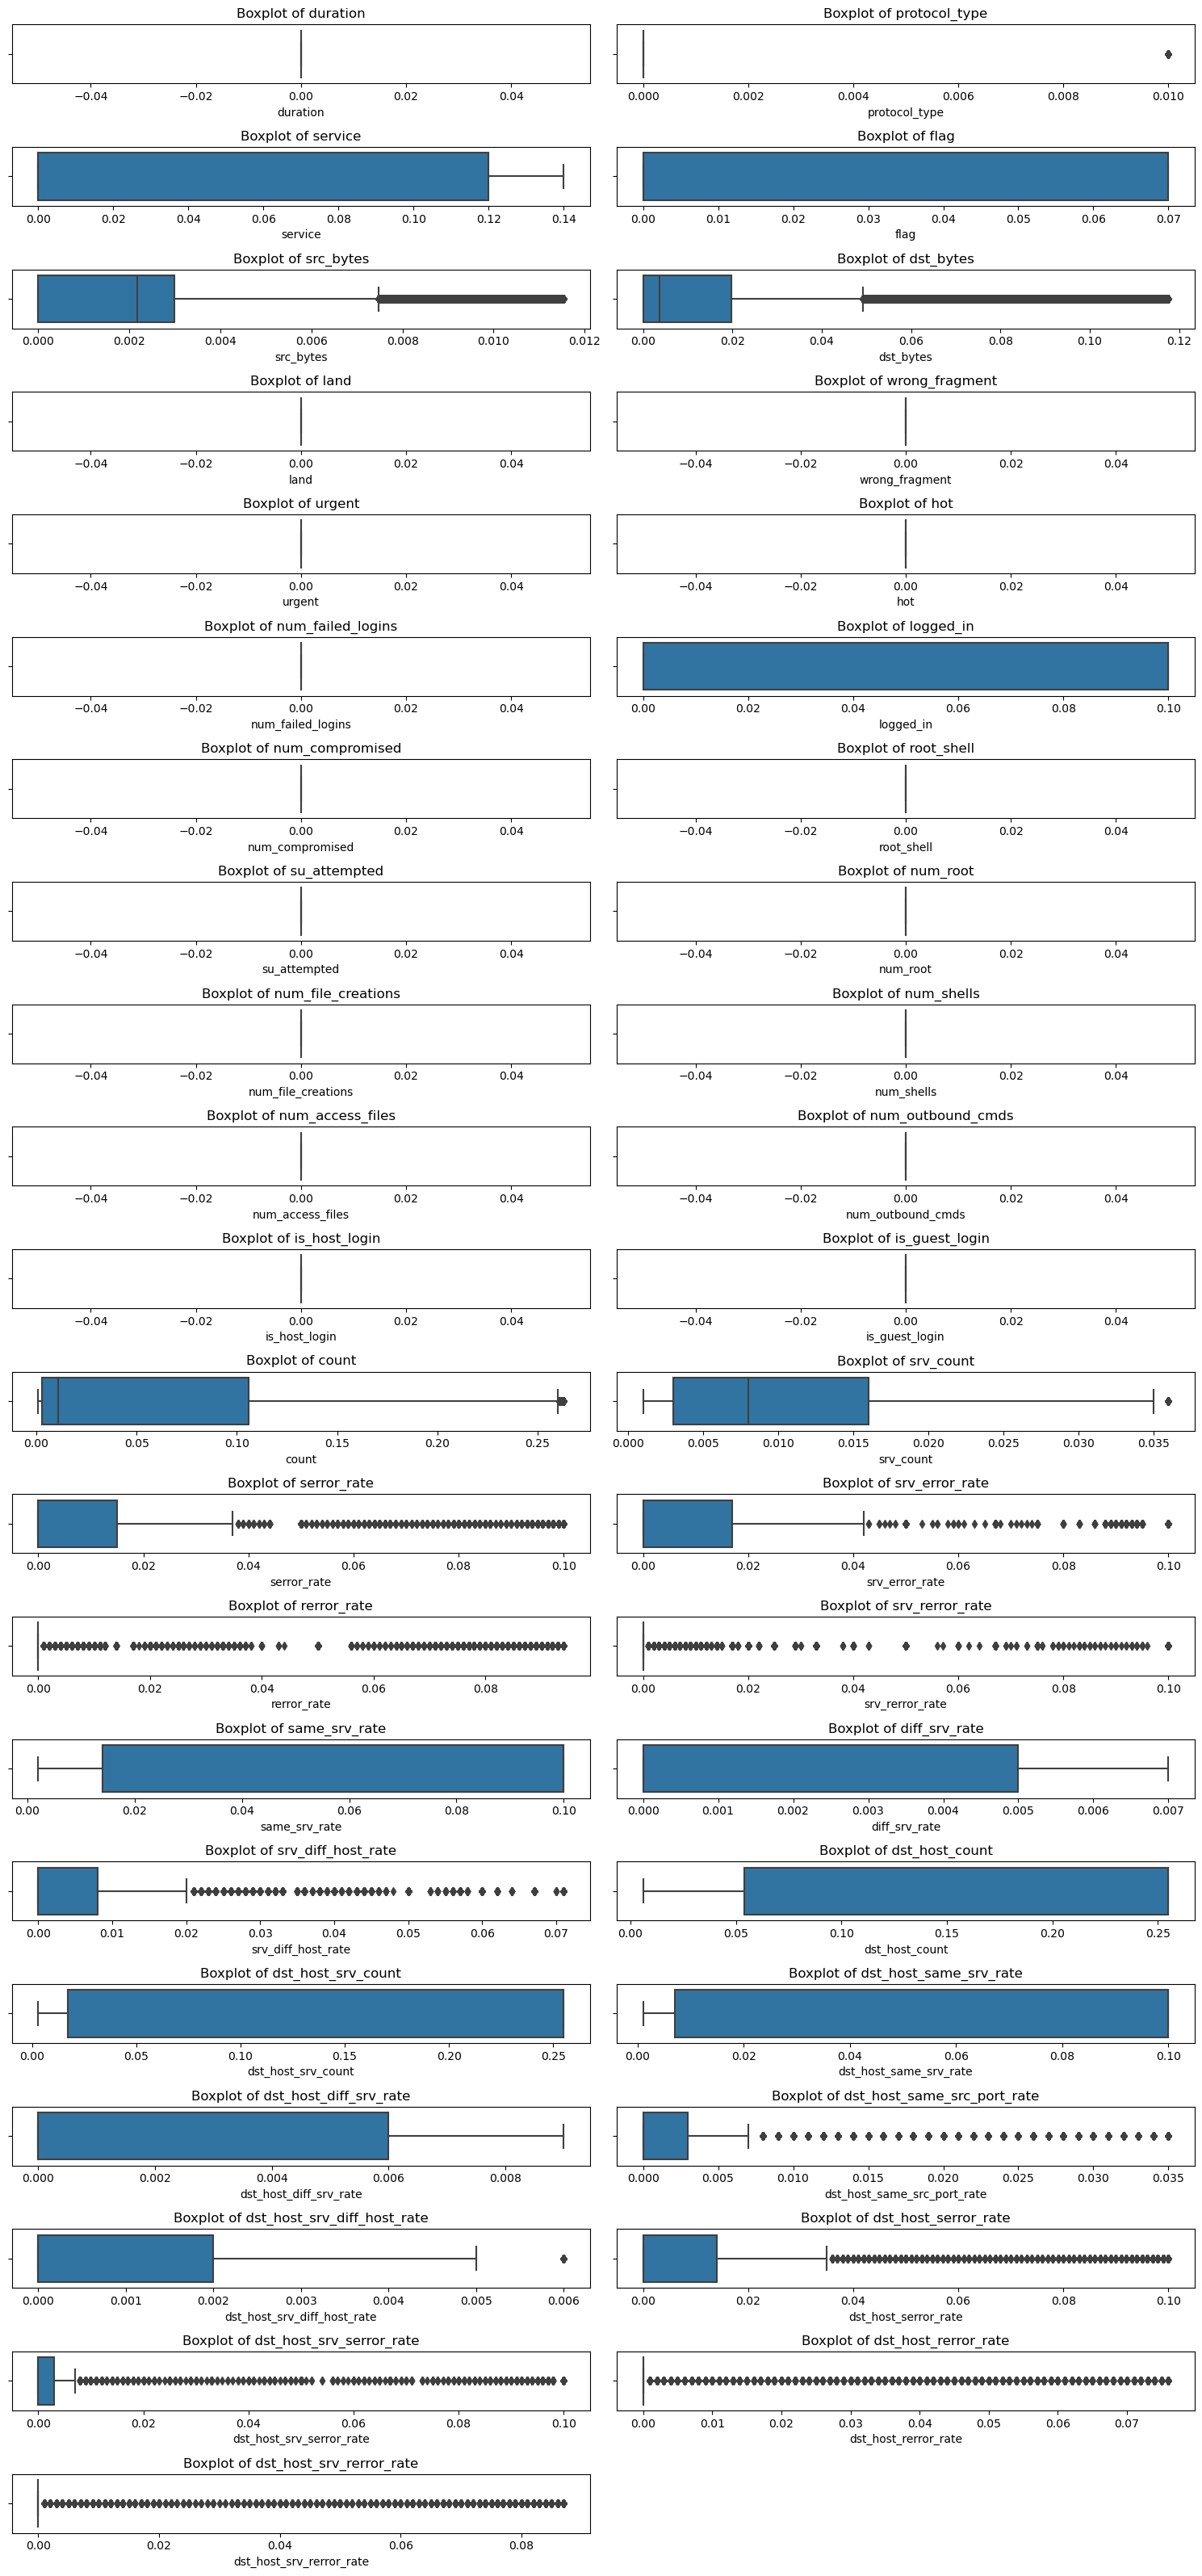

In [67]:
plt.figure(figsize=(15,32))
feature_list = combined_df_continuous.columns
for i in range(len(feature_list)):
    plt.subplot(21,2, i+1)
    sns.boxplot(x=combined_df_continuous[feature_list[i]], data=combined_df_continuous)
    plt.title(f'Boxplot of {feature_list[i]}')
    plt.tight_layout()
plt.show()

### from seeing the above boxplots, we can that there are outliers present in many of the columns 

In [64]:
def outlier_treat(x):
    if ((x.dtype == 'int64') | (x.dtype == 'float64')):
        x=x.clip(lower = x.quantile(0.05), upper =x.quantile(0.95))
    return x

In [65]:
for col in combined_df_continuous.columns:
    combined_df_continuous[col] = outlier_treat(combined_df_continuous[col])

In [66]:
combined_df_continuous.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,817551.0,0.000000,0.000000,0.000,0.000,0.00000,0.00000,0.00000
protocol_type,817551.0,0.000501,0.002182,0.000,0.000,0.00000,0.00000,0.01000
service,817551.0,0.040969,0.056733,0.000,0.000,0.00000,0.12000,0.14000
flag,817551.0,0.020121,0.030887,0.000,0.000,0.00000,0.07000,0.07000
src_bytes,817551.0,0.002371,0.002813,0.000,0.000,0.00217,0.00299,0.01154
dst_bytes,817551.0,0.018541,0.031586,0.000,0.000,0.00367,0.01969,0.11762
land,817551.0,0.000000,0.000000,0.000,0.000,0.00000,0.00000,0.00000
wrong_fragment,817551.0,0.000000,0.000000,0.000,0.000,0.00000,0.00000,0.00000
urgent,817551.0,0.000000,0.000000,0.000,0.000,0.00000,0.00000,0.00000
hot,817551.0,0.000000,0.000000,0.000,0.000,0.00000,0.00000,0.00000


## It can be observed that many columns have only value equals to zero, all these columns with 0 value can be dropped.

In [67]:
for i in combined_df_continuous:
    print("non_Zeros in",i,':',(np.count_nonzero(combined_df_continuous[i])))

non_Zeros in duration : 0
non_Zeros in protocol_type : 40985
non_Zeros in service : 355220
non_Zeros in flag : 246732
non_Zeros in src_bytes : 571811
non_Zeros in dst_bytes : 538209
non_Zeros in land : 0
non_Zeros in wrong_fragment : 0
non_Zeros in urgent : 0
non_Zeros in hot : 0
non_Zeros in num_failed_logins : 0
non_Zeros in logged_in : 521695
non_Zeros in num_compromised : 0
non_Zeros in root_shell : 0
non_Zeros in su_attempted : 0
non_Zeros in num_root : 0
non_Zeros in num_file_creations : 0
non_Zeros in num_shells : 0
non_Zeros in num_access_files : 0
non_Zeros in num_outbound_cmds : 0
non_Zeros in is_host_login : 0
non_Zeros in is_guest_login : 0
non_Zeros in count : 817551
non_Zeros in srv_count : 817551
non_Zeros in serror_rate : 209972
non_Zeros in srv_error_rate : 211437
non_Zeros in rerror_rate : 46362
non_Zeros in srv_rerror_rate : 48405
non_Zeros in same_srv_rate : 817551
non_Zeros in diff_srv_rate : 239720
non_Zeros in srv_diff_host_rate : 236532
non_Zeros in dst_host_cou

In [68]:
cols_to_drop = ['duration', 'land','wrong_fragment','hot','urgent','num_failed_logins','num_compromised','root_shell','su_attempted','num_root',
      'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login']

combined_df_continuous = combined_df_continuous.drop(columns = cols_to_drop)

In [69]:
combined_df_continuous.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_error_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.01154,0.08314,0.1,0.001,0.002,0.0,0.0,...,0.006,0.003,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.01154,0.08314,0.1,0.002,0.003,0.0,0.0,...,0.006,0.003,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.01154,0.08314,0.1,0.003,0.004,0.0,0.0,...,0.006,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.006,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.006,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0


In [70]:
combined_df_catagorical.head()

,attack_name,Activity
0,back,1
1,back,1
2,back,1
3,back,1
4,back,1


## Finally concatenationg continous and categorical variables

In [71]:
df1 = pd.concat([combined_df_continuous, combined_df_catagorical], axis=1)
df1.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_error_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_name,Activity
0,0.0,0.0,0.0,0.01154,0.08314,0.1,0.001,0.002,0.0,0.0,...,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0,back,1
1,0.0,0.0,0.0,0.01154,0.08314,0.1,0.002,0.003,0.0,0.0,...,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0,back,1
2,0.0,0.0,0.0,0.01154,0.08314,0.1,0.003,0.004,0.0,0.0,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,back,1
3,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,back,1
4,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,back,1


In [72]:
final_df = df1.drop(columns = 'attack_name')
final_df.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_error_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Activity
0,0.0,0.0,0.0,0.01154,0.08314,0.1,0.001,0.002,0.0,0.0,...,0.003,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.01154,0.08314,0.1,0.002,0.003,0.0,0.0,...,0.003,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.01154,0.08314,0.1,0.003,0.004,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,1


In [73]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                817551 non-null  float64
 1   service                      817551 non-null  float64
 2   flag                         817551 non-null  float64
 3   src_bytes                    817551 non-null  float64
 4   dst_bytes                    817551 non-null  float64
 5   logged_in                    817551 non-null  float64
 6   count                        817551 non-null  float64
 7   srv_count                    817551 non-null  float64
 8   serror_rate                  817551 non-null  float64
 9   srv_error_rate               817551 non-null  float64
 10  rerror_rate                  817551 non-null  float64
 11  srv_rerror_rate              817551 non-null  float64
 12  same_srv_rate                817551 non-null  float64
 13 

In [74]:
## Checking duplicates
final_df.duplicated().sum()

69639

In [75]:
## dropping the duplicate rows
final_df.drop_duplicates(inplace = True)

In [76]:
final_df.shape

(747912, 26)

In [77]:
#coeff of variance
final_df.apply(lambda x: x.std()/x.mean())[final_df.apply(lambda x: x.std()/x.mean())<0.05]

Series([], dtype: float64)

## Assumptions in classification model
### There should be a relatioship between Independent and target variable
### there should not be correlation between independent variables

In [78]:
corr_matrix = final_df.corr()
corr_matrix

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_error_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Activity
protocol_type,1.000000,-0.000120,-0.133423,-0.133895,-0.141711,-0.352345,-0.000628,0.160363,-0.119600,-0.119925,...,-0.009334,0.035425,-0.020552,0.191459,-0.117537,-0.118368,-0.119467,-0.026819,-0.050124,-0.062755
service,-0.000120,1.000000,0.844582,-0.311126,-0.390759,-0.814375,0.757234,-0.078610,0.783869,0.784535,...,-0.881563,-0.919885,0.840887,0.009786,-0.384435,0.785241,0.785760,0.233832,0.227447,0.870855
flag,-0.133423,0.844582,1.000000,-0.508113,-0.347104,-0.842657,0.836631,-0.050000,0.932508,0.933644,...,-0.820040,-0.870578,0.781481,-0.225052,-0.381177,0.931521,0.934003,0.233327,0.239937,0.956506
src_bytes,-0.133895,-0.311126,-0.508113,1.000000,0.038616,0.521220,-0.449104,-0.178568,-0.455685,-0.456183,...,0.222350,0.280347,-0.142331,0.173052,0.114295,-0.452916,-0.455801,-0.166157,-0.175815,-0.475940
dst_bytes,-0.141711,-0.390759,-0.347104,0.038616,1.000000,0.410196,-0.319285,-0.024463,-0.310013,-0.310272,...,0.402476,0.406710,-0.406631,0.054216,0.259729,-0.311361,-0.311649,-0.128026,-0.120488,-0.343182
logged_in,-0.352345,-0.814375,-0.842657,0.521220,0.410196,1.000000,-0.761160,-0.007145,-0.753121,-0.753615,...,0.797821,0.818339,-0.736677,0.074481,0.386448,-0.753732,-0.754555,-0.300711,-0.296936,-0.841658
count,-0.000628,0.757234,0.836631,-0.449104,-0.319285,-0.761160,1.000000,0.123793,0.778605,0.780862,...,-0.704645,-0.763870,0.694828,-0.224943,-0.401323,0.779141,0.782750,0.226813,0.217945,0.860199
srv_count,0.160363,-0.078610,-0.050000,-0.178568,-0.024463,-0.007145,0.123793,1.000000,-0.022260,-0.024075,...,0.185377,0.147096,-0.184334,-0.167814,-0.122356,-0.022935,-0.023707,-0.078705,-0.072449,-0.018708
serror_rate,-0.119600,0.783869,0.932508,-0.455685,-0.310013,-0.753121,0.778605,-0.022260,1.000000,0.996785,...,-0.751374,-0.807847,0.712861,-0.231787,-0.377051,0.997095,0.995748,-0.107156,-0.104307,0.886850
srv_error_rate,-0.119925,0.784535,0.933644,-0.456183,-0.310272,-0.753615,0.780862,-0.024075,0.996785,1.000000,...,-0.752106,-0.808644,0.714401,-0.231727,-0.377528,0.994585,0.998276,-0.099960,-0.107403,0.887714


In [79]:
## there should be a co-relation between dependent and independent variables
corr_Y_X= corr_matrix[(corr_matrix.Activity<0.1) & (corr_matrix.Activity >-0.1)].T.columns
corr_Y_X

Index(['protocol_type', 'srv_count'], dtype='object')

In [80]:
final_df = final_df.drop(columns=corr_Y_X)

In [81]:
final_df.shape

(747912, 24)

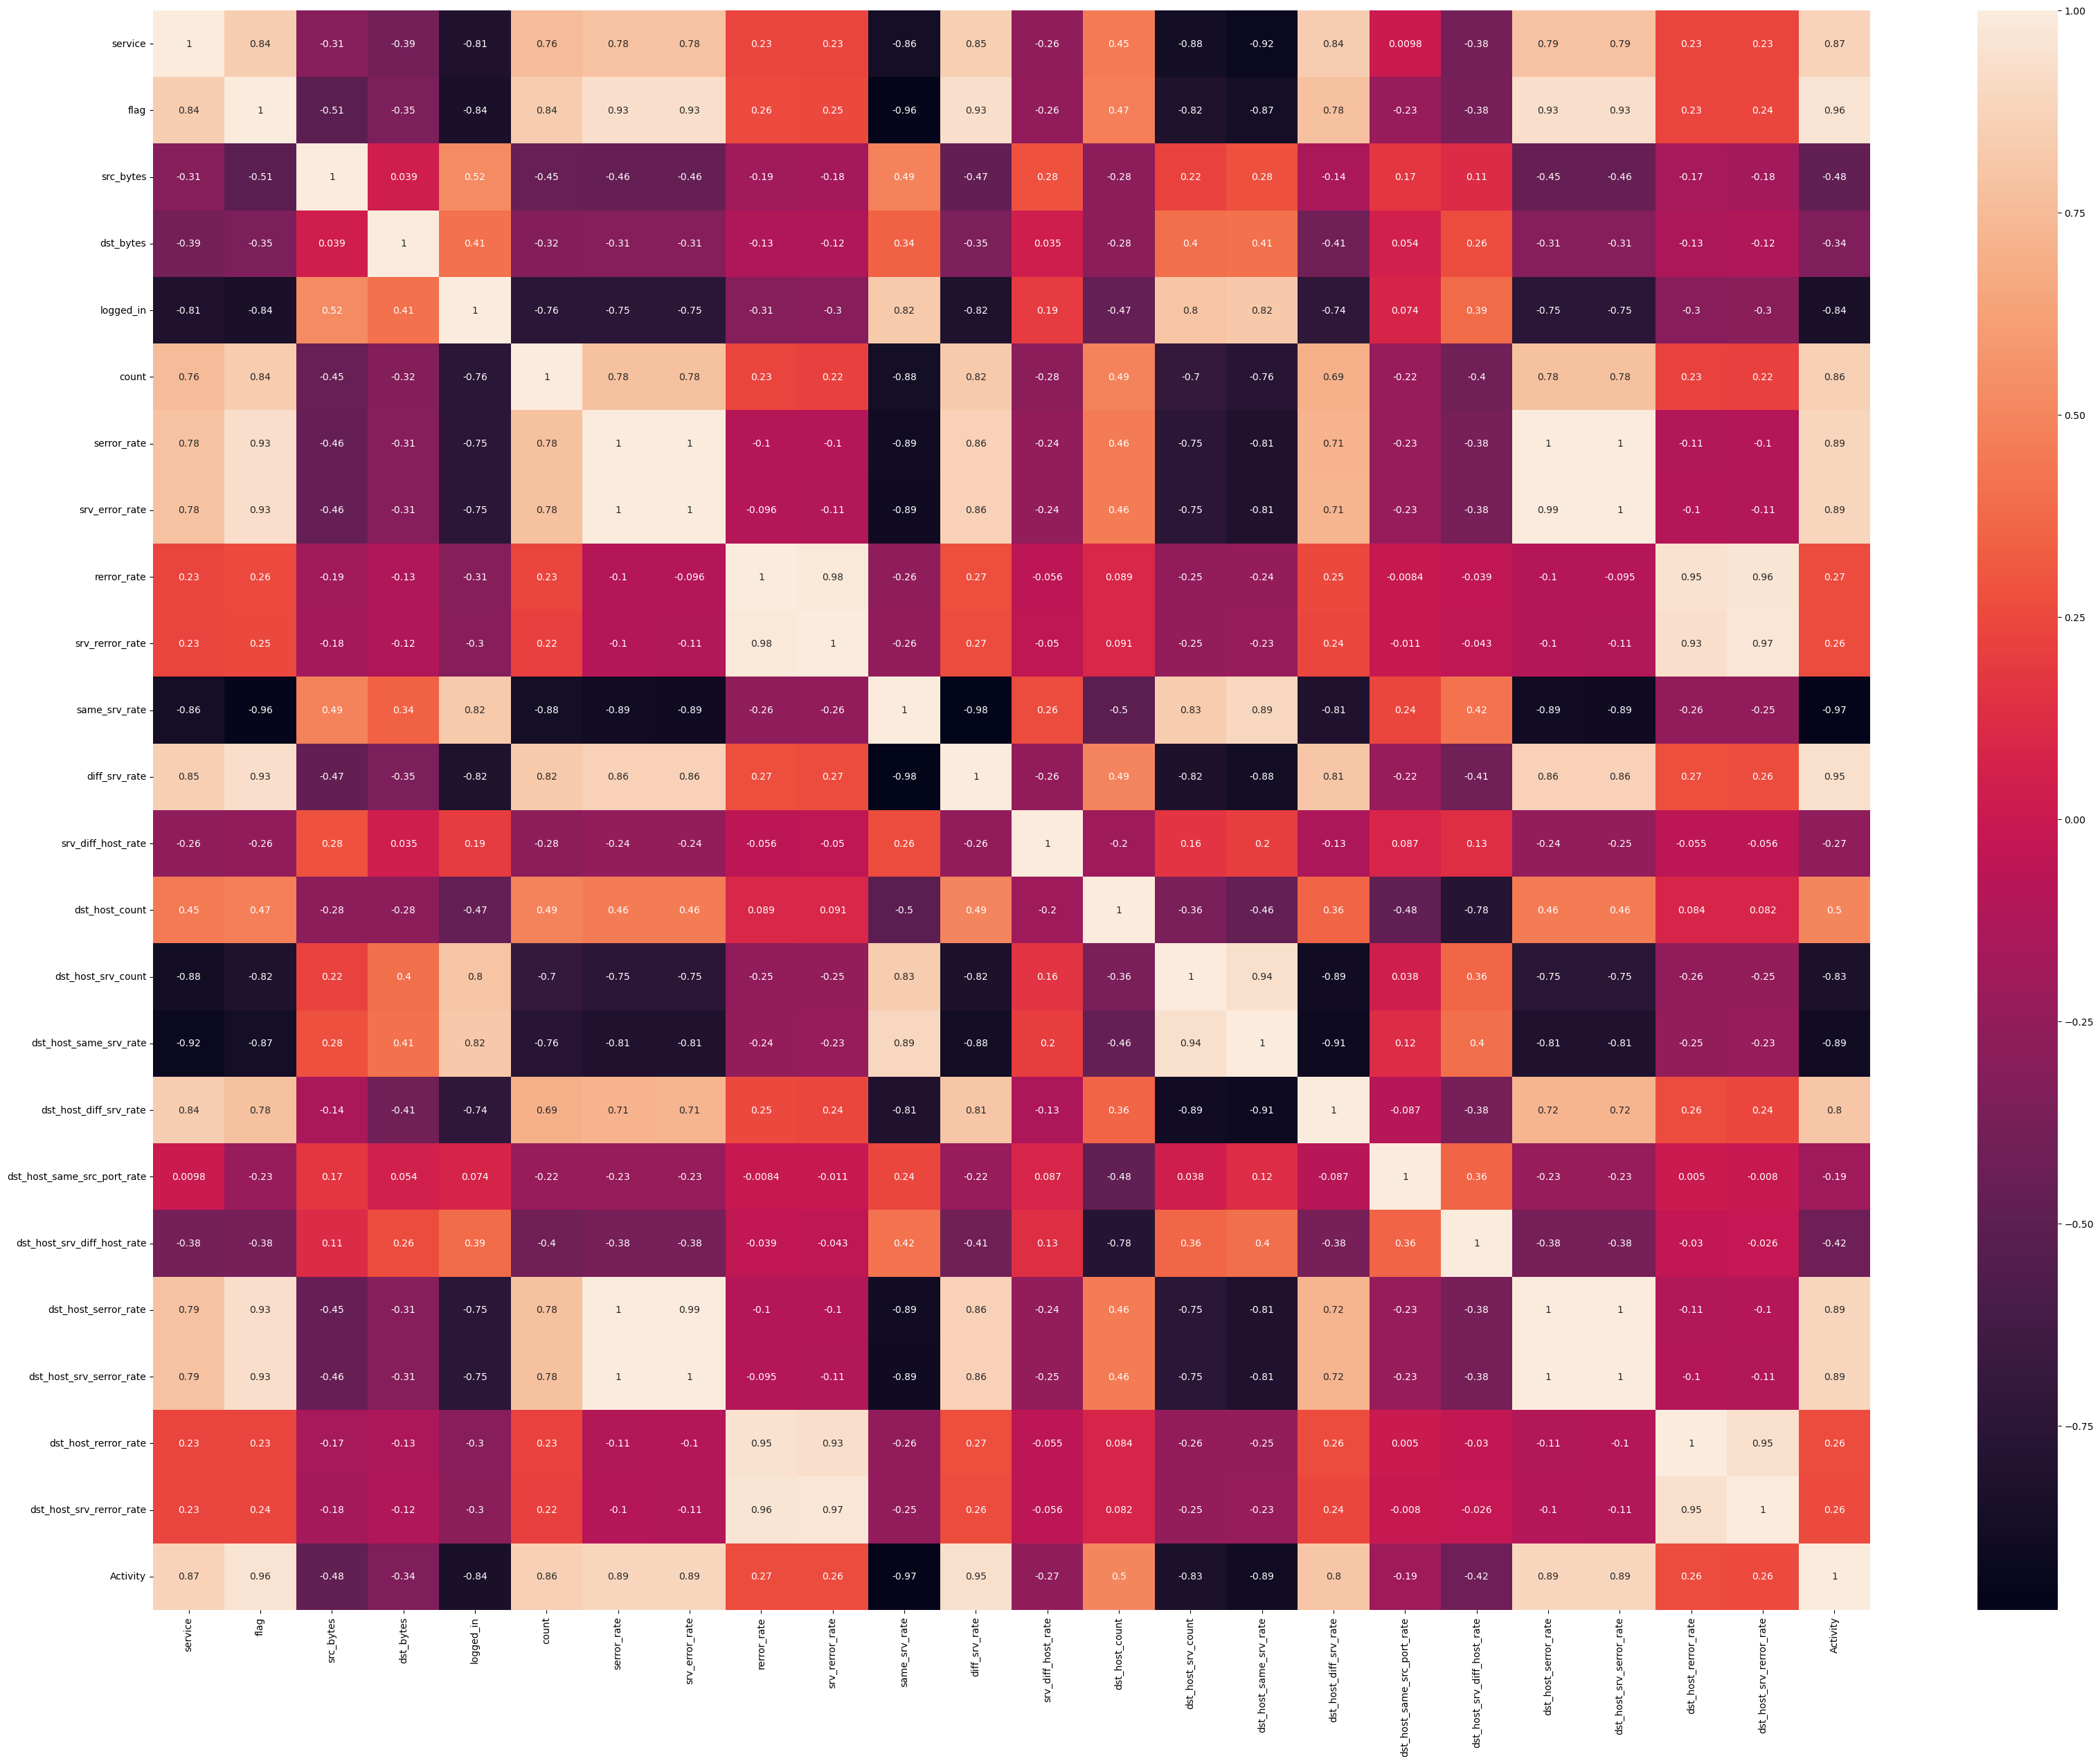

In [82]:
plt.figure(figsize=(40,30))
sns.heatmap(final_df.corr(), annot = True)
plt.show()

In [83]:
## Dropping variables on basis of hign co-relation between independent variables using correlation matrix.

corr_x=final_df.corr()
corr_x_x=corr_x.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.90) | (corr_x_x[0]<-0.90)]['level_0'].drop_duplicates()
corr_x_x

0                 diff_srv_rate
1                 same_srv_rate
3        dst_host_same_srv_rate
4        dst_host_diff_srv_rate
256                        flag
257                 serror_rate
260    dst_host_srv_serror_rate
261             srv_rerror_rate
262          dst_host_srv_count
263    dst_host_srv_rerror_rate
265                 rerror_rate
270        dst_host_serror_rate
273              srv_error_rate
276                     service
Name: level_0, dtype: object

In [84]:
# Drop columns with high correlation
final_df_filtered = final_df.drop(columns=list(corr_x_x))

# Print the filtered DataFrame
final_df_filtered.head()

,src_bytes,dst_bytes,logged_in,count,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,Activity
0,0.01154,0.08314,0.1,0.001,0.071,0.006,0.035,0.0,0.0,1
1,0.01154,0.08314,0.1,0.002,0.067,0.006,0.035,0.0,0.0,1
2,0.01154,0.08314,0.1,0.003,0.050,0.006,0.033,0.0,0.0,1
3,0.01154,0.08314,0.1,0.004,0.000,0.006,0.025,0.0,0.0,1
4,0.01154,0.08314,0.1,0.004,0.000,0.006,0.020,0.0,0.0,1


<AxesSubplot:>

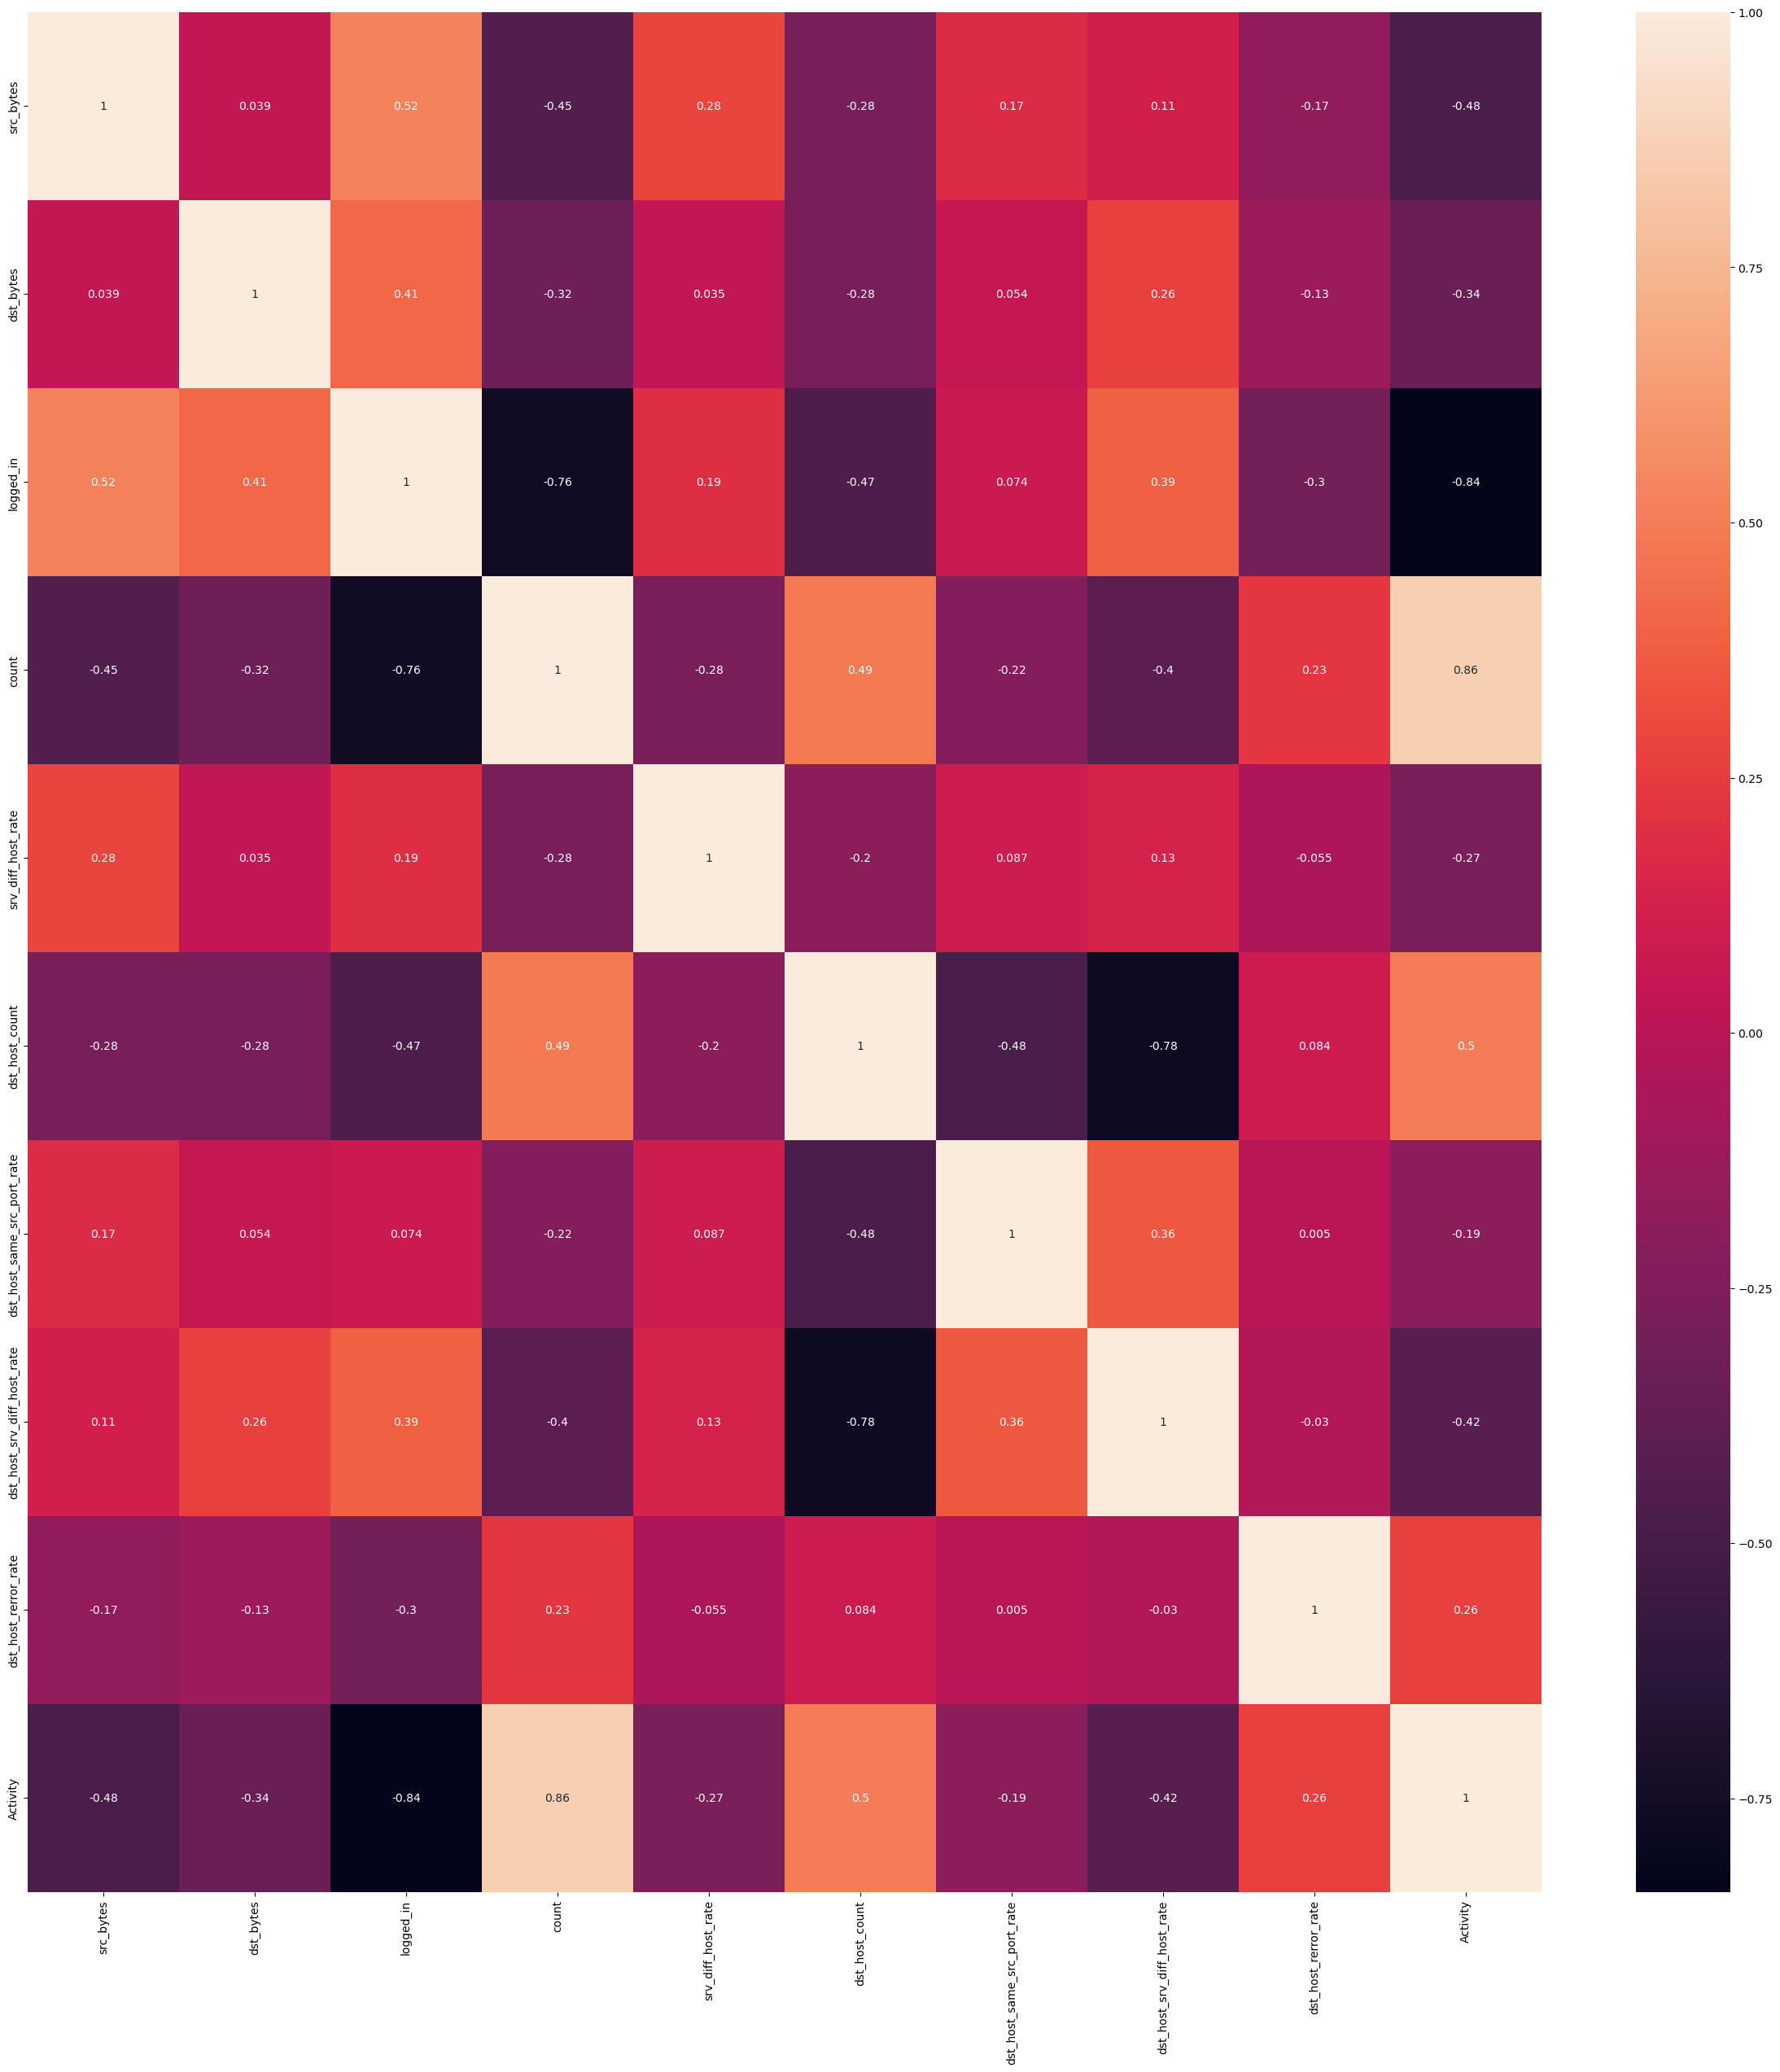

In [85]:
plt.figure(figsize=(30,30))
sns.heatmap(final_df_filtered.corr(), annot = True)

In [86]:
## Now, we have prepared our data 
final_df_filtered.head()

,src_bytes,dst_bytes,logged_in,count,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,Activity
0,0.01154,0.08314,0.1,0.001,0.071,0.006,0.035,0.0,0.0,1
1,0.01154,0.08314,0.1,0.002,0.067,0.006,0.035,0.0,0.0,1
2,0.01154,0.08314,0.1,0.003,0.050,0.006,0.033,0.0,0.0,1
3,0.01154,0.08314,0.1,0.004,0.000,0.006,0.025,0.0,0.0,1
4,0.01154,0.08314,0.1,0.004,0.000,0.006,0.020,0.0,0.0,1


In [87]:
final_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747912 entries, 0 to 817550
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    747912 non-null  float64
 1   dst_bytes                    747912 non-null  float64
 2   logged_in                    747912 non-null  float64
 3   count                        747912 non-null  float64
 4   srv_diff_host_rate           747912 non-null  float64
 5   dst_host_count               747912 non-null  float64
 6   dst_host_same_src_port_rate  747912 non-null  float64
 7   dst_host_srv_diff_host_rate  747912 non-null  float64
 8   dst_host_rerror_rate         747912 non-null  float64
 9   Activity                     747912 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 59.9 MB


## BINOMIAL CLASSIFICATION

### MODEL BUILDING USING LOGISTIC REGRESSION TECHNIQUE

In [112]:
## Difining the target and independent variable
y = final_df_filtered.Activity
X = final_df_filtered[final_df_filtered.columns.difference(['Activity'])]

In [113]:
y

0         1
1         1
2         1
3         1
4         1
         ..
817546    1
817547    1
817548    1
817549    1
817550    1
Name: Activity, Length: 747912, dtype: int32

In [114]:
X

,count,dst_bytes,dst_host_count,dst_host_rerror_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,logged_in,src_bytes,srv_diff_host_rate
0,0.001,0.08314,0.006,0.0,0.035,0.0,0.1,0.01154,0.071
1,0.002,0.08314,0.006,0.0,0.035,0.0,0.1,0.01154,0.067
2,0.003,0.08314,0.006,0.0,0.033,0.0,0.1,0.01154,0.050
3,0.004,0.08314,0.006,0.0,0.025,0.0,0.1,0.01154,0.000
4,0.004,0.08314,0.006,0.0,0.020,0.0,0.1,0.01154,0.000
...,...,...,...,...,...,...,...,...,...
817546,0.251,0.00000,0.255,0.0,0.035,0.0,0.0,0.01032,0.000
817547,0.252,0.00000,0.255,0.0,0.035,0.0,0.0,0.01032,0.000
817548,0.253,0.00000,0.255,0.0,0.035,0.0,0.0,0.01032,0.000
817549,0.254,0.00000,0.255,0.0,0.035,0.0,0.0,0.01032,0.000


In [115]:
## Splitting the data into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [116]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598329, 9)
(598329,)
(149583, 9)
(149583,)


In [117]:
## Checking class imbalance
y_train.value_counts()/y_train.value_counts().sum()

0    0.756072
1    0.243928
Name: Activity, dtype: float64

In [94]:
# !pip install imbalanced-learn

In [95]:
import imblearn

## Treating imbalanced class using SMOTE()

In [96]:
#smt = imblearn.over_sampling.SMOTE()

In [97]:
#X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

In [98]:
#X_train_resampled.shape

(904760, 9)

In [99]:
#y_train_resampled.shape

(904760,)

In [100]:
#y_train_resampled.value_counts()

1    452380
0    452380
Name: Activity, dtype: int64

## Building KNN model for classification

In [101]:
# knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [102]:
# knn_model = knn_model.fit(X_train_resampled, y_train_resampled)

In [96]:
import  sklearn.metrics as metrics

In [ ]:
# print(metrics.classification_report(y_train_resampled, knn_model.predict(X_train_resampled)))


In [97]:
## Resampling using SMOTE() technique taking so much time for model learning. As we have lots of observation, we can do the undersampling.

In [98]:
from imblearn.under_sampling import RandomUnderSampler

In [99]:
undersampler = RandomUnderSampler(random_state=42)

In [100]:
X_train_undersamp, y_train_undersamp = undersampler.fit_resample(X_train, y_train)

In [101]:
print(X_train_undersamp.shape)
print(y_train_undersamp.shape)
print(y_train_undersamp.value_counts())

(291898, 9)
(291898,)
0    145949
1    145949
Name: Activity, dtype: int64


In [102]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [103]:
knn_model = knn_model.fit(X_train_undersamp, y_train_undersamp)

In [104]:
import  sklearn.metrics as metrics

In [105]:
print(metrics.classification_report(y_train_undersamp, knn_model.predict(X_train_undersamp)))

print(metrics.classification_report(y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    145949
           1       1.00      1.00      1.00    145949

    accuracy                           1.00    291898
   macro avg       1.00      1.00      1.00    291898
weighted avg       1.00      1.00      1.00    291898

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113159
           1       0.99      1.00      0.99     36424

    accuracy                           1.00    149583
   macro avg       0.99      1.00      1.00    149583
weighted avg       1.00      1.00      1.00    149583



In [106]:
train_pred_prob = pd.DataFrame(knn_model.predict_proba(X_train_undersamp))[1]
test_pred_prob = pd.DataFrame(knn_model.predict_proba(X_test))[1]

In [107]:
KNN_train, KNN_test = knn_model.score(X_train_undersamp , y_train_undersamp), knn_model.score(X_test , y_test)

print(f"Training Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Training Score: 0.9999349087695016
Test Score: 0.9966306331601853


In [108]:
print('train_auc_score:', metrics.roc_auc_score(y_train_undersamp, train_pred_prob))
print('test_auc_score:', metrics.roc_auc_score(y_test, test_pred_prob))

train_auc_score: 0.9999999814798388
test_auc_score: 0.9991551750214528


## Logistic regression technique by Statsmodels

In [163]:
import statsmodels.formula.api as sm

In [164]:
' + '.join(list( X_train_undersamp.columns ))

'count + dst_bytes + dst_host_count + dst_host_rerror_rate + dst_host_same_src_port_rate + dst_host_srv_diff_host_rate + logged_in + src_bytes + srv_diff_host_rate'

In [165]:
formula1 = 'Activity ~ count + dst_bytes + dst_host_count + dst_host_rerror_rate + dst_host_same_src_port_rate + dst_host_srv_diff_host_rate + logged_in + src_bytes + srv_diff_host_rate'

In [166]:
train,test=train_test_split(final_df_filtered, test_size=0.3, random_state=42)

In [167]:
train.head()

,src_bytes,dst_bytes,logged_in,count,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,Activity
127307,0.00000,0.00000,0.0,0.135,0.0,0.255,0.00,0.000,0.0,1
158502,0.00000,0.00000,0.0,0.102,0.0,0.255,0.00,0.000,0.0,1
291110,0.00216,0.00525,0.1,0.005,0.0,0.010,0.01,0.004,0.0,0
232891,0.00164,0.00174,0.1,0.001,0.0,0.255,0.00,0.000,0.0,0
47413,0.00000,0.00000,0.0,0.149,0.0,0.255,0.00,0.000,0.0,1


In [168]:
test.head()

,src_bytes,dst_bytes,logged_in,count,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,Activity
240727,0.00321,0.02486,0.1,0.020,0.008,0.181,0.001,0.001,0.0,0
575378,0.01154,0.00334,0.1,0.001,0.000,0.081,0.001,0.002,0.0,0
480187,0.00227,0.00291,0.1,0.010,0.011,0.010,0.010,0.006,0.0,0
111969,0.00000,0.00000,0.0,0.251,0.000,0.255,0.000,0.000,0.0,1
300321,0.00348,0.00510,0.1,0.004,0.006,0.161,0.001,0.002,0.0,0


In [169]:
model = sm.logit(formula1, final_df_filtered).fit()

Optimization terminated successfully.
         Current function value: 0.081267
         Iterations 12


In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Activity   No. Observations:               747912
Model:                          Logit   Df Residuals:                   747902
Method:                           MLE   Df Model:                            9
Date:                Sun, 10 Sep 2023   Pseudo R-squ.:                  0.8537
Time:                        14:06:37   Log-Likelihood:                -60781.
converged:                       True   LL-Null:                   -4.1544e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.8218      0.047    -60.512      0.000      -2.913      -2.730
count                          23.7467      0.157    151.133      0.000      23.439      24.055
dst_bytes                      22.2142      0.653     34.027      0.000      20.935      23.494
dst_host_count                  9.1779      0.181     50.599      0.000       8.822       9.533
dst_host_rerror_rate           20.7988      0.510     40.821      0.000      19.800      21.797
dst_host_same_src_port_rate    12.0943      0.939     12.876      0.000      10.253      13.935
dst_host_srv_diff_host_rate  -164.2929      8.880    -18.502      0.000    -181.697    -146.889
logged_in                     -56.1764      0.535   -104.994      0.000     -57.225     -55.128
src_bytes                     -96.5523      5.051    -19.114      0.000    -106.453     -86.652
srv_diff_host_rate            -32.6033      0.759    -42.963      0.000     -34.091     -31.116
===============================================================================================
"""

In [171]:
# Variation Inflation Factor- to check multicolinearity between variables on baiss of high VIF value(insignificance of variable)
## if the VIF is above 10, multicolinearity is likely present and we should consider dropping the variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_train_undersamp.values, i) for i in range(X_train_undersamp.shape[1])]
vif["features"] = X_train_undersamp.columns

In [172]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
6,6.144873,logged_in
2,5.436708,dst_host_count
0,4.274616,count
7,2.759901,src_bytes
5,2.571889,dst_host_srv_diff_host_rate
1,1.752962,dst_bytes
4,1.426211,dst_host_same_src_port_rate
8,1.354681,srv_diff_host_rate
3,1.156425,dst_host_rerror_rate


### Prdictions by model

In [173]:
train_pred = model.predict(train)
test_pred = model.predict(test)

### Checking model accuracy

In [174]:
print("ROC AUC Score of training data: ", (metrics.roc_auc_score(train['Activity'], train_pred)))
print("ROC AUC Score of testing data: ", (metrics.roc_auc_score(test['Activity'], test_pred)))

ROC AUC Score of training data:  0.9918782780455996
ROC AUC Score of testing data:  0.9921340908415602


#### The ROC AUC score is coming out to be good. Hence, we consider our model good.

# Logistic Regression Model

In [175]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(X_train_undersamp, y_train_undersamp)

LogisticRegression(random_state=42)

In [176]:
lg_train, lg_test = lg_model.score(X_train_undersamp , y_train_undersamp), lg_model.score(X_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9745287737497345
Test Score: 0.9702506300849696


## Decision Tree Classifier

In [120]:
DTmodel = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
DTmodel.fit(X_train_undersamp, y_train_undersamp)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

In [121]:
pred_prob_train = pd.DataFrame(DTmodel.predict_proba(X_train_undersamp))[1]

In [122]:
metrics.roc_auc_score(y_train_undersamp, pred_prob_train)

0.9948508201729702

In [123]:
pred_prob_test = pd.DataFrame(DTmodel.predict_proba(X_test))[1]
metrics.roc_auc_score(y_test, pred_prob_test)

0.9954867601759535

In [124]:
print(metrics.classification_report(y_train_undersamp, DTmodel.predict(X_train_undersamp)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    145949
           1       1.00      0.99      0.99    145949

    accuracy                           0.99    291898
   macro avg       0.99      0.99      0.99    291898
weighted avg       0.99      0.99      0.99    291898



In [125]:
print(metrics.classification_report(y_test, DTmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113159
           1       1.00      0.99      0.99     36424

    accuracy                           1.00    149583
   macro avg       1.00      1.00      1.00    149583
weighted avg       1.00      1.00      1.00    149583



In [126]:
#Train data - AUC Score
print(metrics.roc_auc_score(y_train_undersamp, pd.DataFrame(DTmodel.predict_proba(X_train_undersamp))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(y_test, pd.DataFrame(DTmodel.predict_proba(X_test))[1]))

0.9948508201729702
0.9954867601759535


In [127]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10],
              'max_leaf_nodes': [5,6,7,8,9,10,11,12]
}
#model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted')
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
model.fit(X_train_undersamp, y_train_undersamp)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='roc_auc')

In [128]:
model.best_params_

{'max_depth': 4, 'max_leaf_nodes': 12}

In [129]:
model.best_score_

0.9970916987694171

In [130]:
DTmodel2 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)
DTmodel2.fit(X_train_undersamp, y_train_undersamp)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)

In [131]:
#Train data - AUC Score
print(metrics.roc_auc_score(y_train_undersamp, pd.DataFrame(DTmodel2.predict_proba(X_train_undersamp))[1]))

#Test data - AUC Score
print(metrics.roc_auc_score(y_test, pd.DataFrame(DTmodel2.predict_proba(X_test))[1]))

0.9973502967729133
0.9977617956536637


In [132]:
DT_train, DT_test = DTmodel2.score(X_train_undersamp , y_train_undersamp), DTmodel2.score(X_test , y_test)

print(f"Training Score: {DT_train}")
print(f"Test Score: {DT_test}")

Training Score: 0.9946111312855861
Test Score: 0.9970584892668285


In [133]:
DTmodel2.feature_importances_

array([1.64510578e-02, 9.23220756e-03, 2.45573606e-04, 6.92628796e-03,
       0.00000000e+00, 1.81271823e-02, 0.00000000e+00, 9.49017691e-01,
       0.00000000e+00])

In [134]:
X_train_undersamp.columns

Index(['count', 'dst_bytes', 'dst_host_count', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'logged_in', 'src_bytes', 'srv_diff_host_rate'],
      dtype='object')

In [135]:
var_imp = pd.DataFrame([X_train_undersamp.columns, DTmodel2.feature_importances_]).T

In [136]:
var_imp.columns = ['var', 'imp']

In [137]:
var_imp.sort_values(by= 'imp', ascending=False, inplace=True)

<AxesSubplot:>

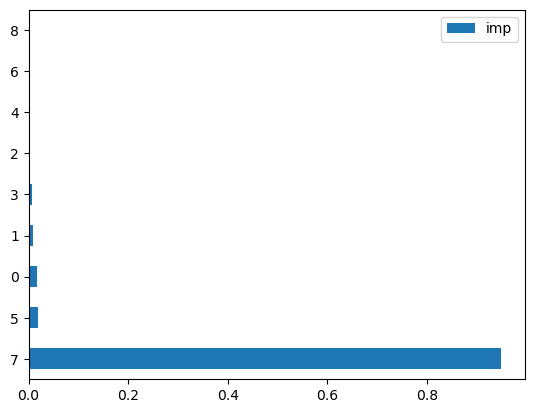

In [138]:
var_imp.plot(kind='barh')

In [139]:
var_imp

,var,imp
7,src_bytes,0.949018
5,dst_host_srv_diff_host_rate,0.018127
0,count,0.016451
1,dst_bytes,0.009232
3,dst_host_rerror_rate,0.006926
2,dst_host_count,0.000246
4,dst_host_same_src_port_rate,0.0
6,logged_in,0.0
8,srv_diff_host_rate,0.0


In [140]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [141]:
#!pip install pydotplus

In [142]:
from sklearn.tree import export_graphviz

In [146]:
# Exporting the tree output in the form open document
export_graphviz( DTmodel2,
              out_file = "model_tree.odt",
              feature_names = X_train_undersamp.columns )

In [147]:
# Converting open document file to jpg imanage

import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_tree.odt' )

In [148]:
from IPython.display import Image

In [149]:
chd_tree_graph.write_jpg( 'model_tree.jpg' )

True

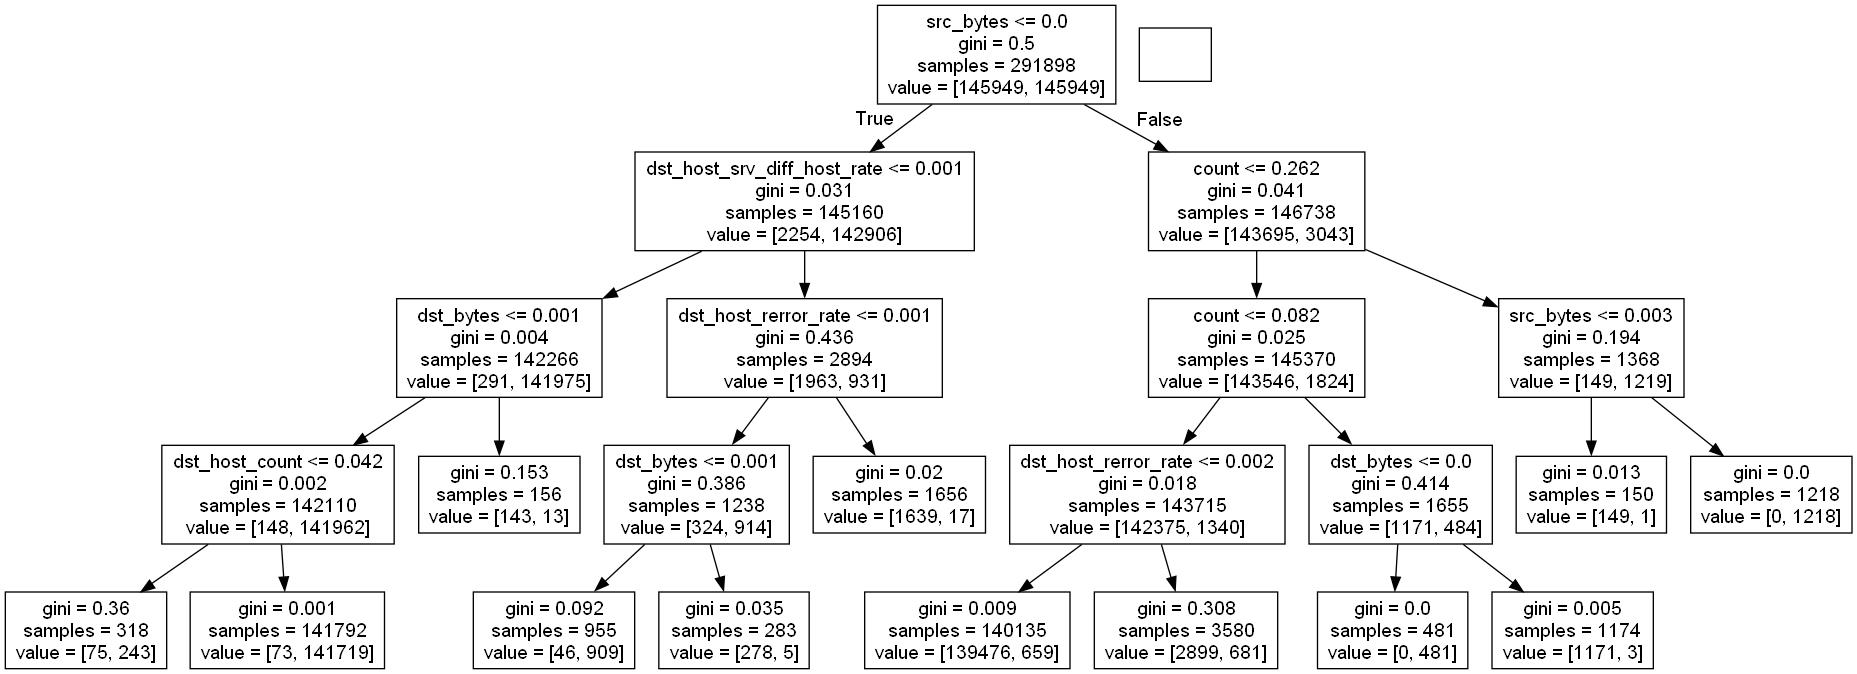

In [150]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='model_tree.jpg')

In [151]:
DTmodel2

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)

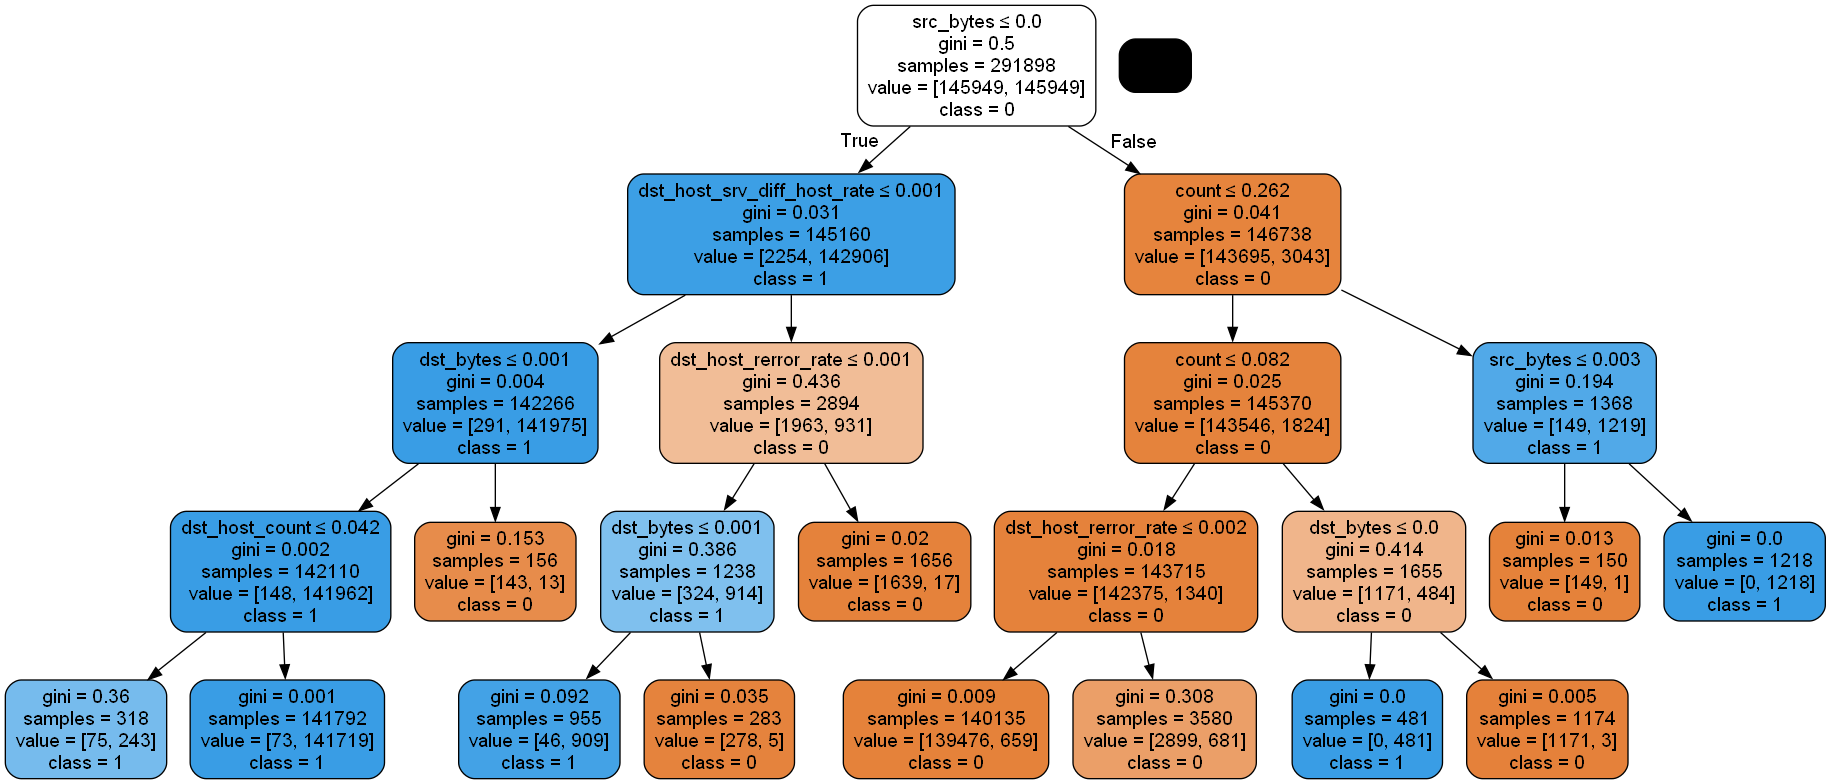

In [155]:
export_graphviz(DTmodel2, 'dot_data.dot',  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train_undersamp.columns,class_names=['0','1'])
graph = pdot.graphviz.graph_from_dot_file('dot_data.dot')  
graph.write_png('tree_final.png')
Image('tree_final.png')

In [156]:
from sklearn.tree import export_text

In [157]:
text_representation = export_text(DTmodel2, feature_names = list(X_train_undersamp.columns))
print(text_representation)

|--- src_bytes <= 0.00
|   |--- dst_host_srv_diff_host_rate <= 0.00
|   |   |--- dst_bytes <= 0.00
|   |   |   |--- dst_host_count <= 0.04
|   |   |   |   |--- class: 1
|   |   |   |--- dst_host_count >  0.04
|   |   |   |   |--- class: 1
|   |   |--- dst_bytes >  0.00
|   |   |   |--- class: 0
|   |--- dst_host_srv_diff_host_rate >  0.00
|   |   |--- dst_host_rerror_rate <= 0.00
|   |   |   |--- dst_bytes <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- dst_bytes >  0.00
|   |   |   |   |--- class: 0
|   |   |--- dst_host_rerror_rate >  0.00
|   |   |   |--- class: 0
|--- src_bytes >  0.00
|   |--- count <= 0.26
|   |   |--- count <= 0.08
|   |   |   |--- dst_host_rerror_rate <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- dst_host_rerror_rate >  0.00
|   |   |   |   |--- class: 0
|   |   |--- count >  0.08
|   |   |   |--- dst_bytes <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- dst_bytes >  0.00
|   |   |   |   |--- class: 0
|   |--- count >  0.26
|   |   |--- s

In [158]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [159]:
import sklearn.tree as tree

In [160]:
from sklearn.tree import plot_tree

In [161]:
import matplotlib.pyplot as plt

[Text(0.5131578947368421, 0.9, 'src_bytes <= 0.0\ngini = 0.5\nsamples = 291898\nvalue = [145949, 145949]\nclass = y'),
 Text(0.2631578947368421, 0.7, 'dst_host_srv_diff_host_rate <= 0.001\ngini = 0.031\nsamples = 145160\nvalue = [2254, 142906]\nclass = e'),
 Text(0.15789473684210525, 0.5, 'dst_bytes <= 0.001\ngini = 0.004\nsamples = 142266\nvalue = [291, 141975]\nclass = e'),
 Text(0.10526315789473684, 0.3, 'dst_host_count <= 0.042\ngini = 0.002\nsamples = 142110\nvalue = [148, 141962]\nclass = e'),
 Text(0.05263157894736842, 0.1, 'gini = 0.36\nsamples = 318\nvalue = [75, 243]\nclass = e'),
 Text(0.15789473684210525, 0.1, 'gini = 0.001\nsamples = 141792\nvalue = [73, 141719]\nclass = e'),
 Text(0.21052631578947367, 0.3, 'gini = 0.153\nsamples = 156\nvalue = [143, 13]\nclass = y'),
 Text(0.3684210526315789, 0.5, 'dst_host_rerror_rate <= 0.001\ngini = 0.436\nsamples = 2894\nvalue = [1963, 931]\nclass = y'),
 Text(0.3157894736842105, 0.3, 'dst_bytes <= 0.001\ngini = 0.386\nsamples = 1238\

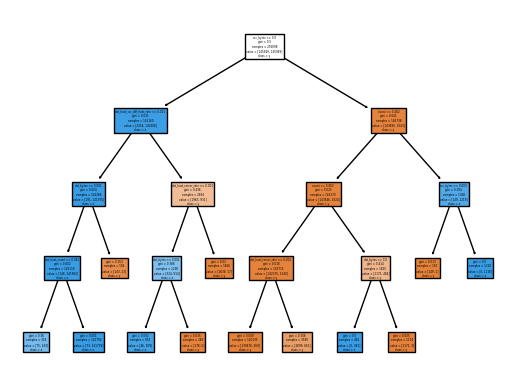

In [162]:
tree.plot_tree(DTmodel2, 
                   feature_names=X_train_undersamp.columns,  
                   class_names='yes',
                   filled=True)

## Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( X_train_undersamp, y_train_undersamp )

RandomForestClassifier(max_features=6, n_jobs=-1, oob_score=True)

In [178]:
pd.DataFrame(radm_clf.predict_proba(X_train_undersamp))[1]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
291893    1.0
291894    1.0
291895    1.0
291896    1.0
291897    1.0
Name: 1, Length: 291898, dtype: float64

In [179]:
print('train_auc_score:', metrics.roc_auc_score(y_train_undersamp, pd.DataFrame(radm_clf.predict_proba(X_train_undersamp))[1]))
print('test_auc_score:', metrics.roc_auc_score(y_test, pd.DataFrame(radm_clf.predict_proba(X_test))[1]))

train_auc_score: 0.999999949979134
test_auc_score: 0.9999673994010635


In [180]:
RF_train, RF_test = radm_clf.score(X_train_undersamp , y_train_undersamp), radm_clf.score(X_test , y_test)

print(f"Training Score: {RF_train}")
print(f"Test Score: {RF_test}")

Training Score: 0.9999417604779752
Test Score: 0.9997259046816818


In [181]:
radm_clf.feature_importances_

array([5.65315429e-02, 2.22365457e-01, 1.18407986e-02, 6.76306652e-03,
       2.81279608e-03, 1.18571366e-02, 9.53720799e-03, 6.77772128e-01,
       5.19866060e-04])

In [182]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [183]:
import seaborn as sns

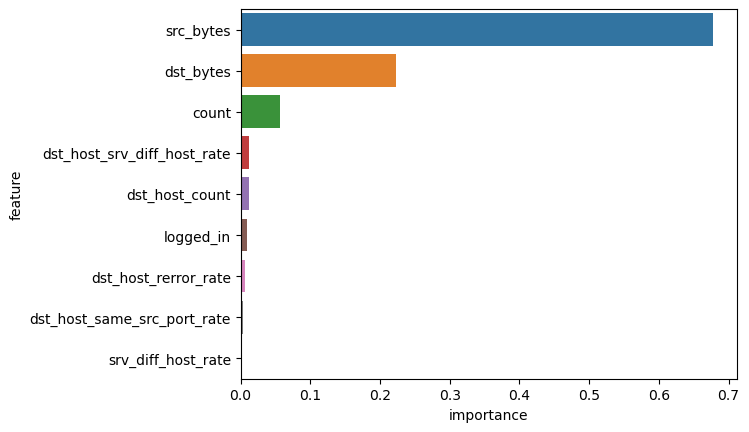

In [186]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train_undersamp.shape[1]):
    feature_rank.loc[f] = [f+1,
                         X_train_undersamp.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.show()

In [187]:
feature_rank

,rank,feature,importance
0,1,src_bytes,0.677772
1,2,dst_bytes,0.222365
2,3,count,0.056532
3,4,dst_host_srv_diff_host_rate,0.011857
4,5,dst_host_count,0.011841
5,6,logged_in,0.009537
6,7,dst_host_rerror_rate,0.006763
7,8,dst_host_same_src_port_rate,0.002813
8,9,srv_diff_host_rate,0.000520


## Gradient Boosting Algorithm (GBM)

In [188]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [189]:
SKGB = GradientBoostingClassifier(random_state=12)
SKGB.fit(X_train_undersamp, y_train_undersamp)

GradientBoostingClassifier(random_state=12)

In [190]:
print('train_auc_score:', metrics.roc_auc_score(y_train_undersamp, pd.DataFrame(SKGB.predict_proba(X_train_undersamp))[1]))
print('test_auc_score:', metrics.roc_auc_score(y_test, pd.DataFrame(SKGB.predict_proba(X_test))[1]))

train_auc_score: 0.9999855020235431
test_auc_score: 0.9999763531020641


In [191]:
SKGB_train, SKGB_test = SKGB.score(X_train_undersamp , y_train_undersamp), SKGB.score(X_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9989756695832106
Test Score: 0.999084120521717


# XGBoost Gradient Boosting Model

In [192]:
import xgboost
from xgboost import XGBClassifier

In [193]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

In [194]:
gscv_xg.fit(X_train_undersamp, y_train_undersamp)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [195]:
gscv_xg.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [196]:
gscv_xg.best_score_

0.9995854718016531

In [197]:
GSCV_XGB = XGBClassifier(n_estimators = 100, max_depth = 5,
                        n_jobs=-1)

In [198]:
GSCV_XGB.fit(X_train_undersamp, y_train_undersamp)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [199]:
print('train_auc_score:', metrics.roc_auc_score(y_train_undersamp, pd.DataFrame(GSCV_XGB.predict_proba(X_train_undersamp))[1]))
print('test_auc_score:', metrics.roc_auc_score(y_test, pd.DataFrame(GSCV_XGB.predict_proba(X_test))[1]))

train_auc_score: 0.9999999269991114
test_auc_score: 0.9999975607172604


In [200]:
XGB_train, XGB_test = GSCV_XGB.score(X_train_undersamp , y_train_undersamp), GSCV_XGB.score(X_test , y_test)

print(f"Training Score: {XGB_train}")
print(f"Test Score: {XGB_test}")

Training Score: 0.9998869468101871
Test Score: 0.9997125341783492


# SKLearn AdaBoost Model

In [201]:
ab_model = AdaBoostClassifier(random_state=42)

In [202]:
ab_model.fit(X_train_undersamp, y_train_undersamp)

AdaBoostClassifier(random_state=42)

In [203]:
ab_train, ab_test = ab_model.score(X_train_undersamp , y_train_undersamp), ab_model.score(X_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 0.9959369368752098
Test Score: 0.9963231115835356


# Naive Bayes Model

In [204]:
from sklearn.naive_bayes import BernoulliNB

In [205]:
BNB_model = BernoulliNB()
BNB_model.fit(X_train_undersamp, y_train_undersamp)

BernoulliNB()

In [206]:
BNB_train, BNB_test = BNB_model.score(X_train_undersamp , y_train_undersamp), BNB_model.score(X_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.986731666541052
Test Score: 0.9857670992024494


## Voting Classifier

In [209]:
from sklearn.ensemble import VotingClassifier

In [211]:
estimator = []
estimator.append(('knn_model', 
                  knn_model))
estimator.append(('radm_clf',radm_clf))
estimator.append(('tree_Model',DTmodel2))
estimator.append(('GBM',SKGB))
estimator.append(('XGBoost',GSCV_XGB)) 
estimator.append(('AdaBoost',ab_model))
estimator.append(('LogisticRegression',lg_model))
estimator.append(('NaiveBayes',BNB_model))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train_undersamp, y_train_undersamp)

VotingClassifier(estimators=[('knn_model',
                              KNeighborsClassifier(weights='distance')),
                             ('radm_clf',
                              RandomForestClassifier(max_features=6, n_jobs=-1,
                                                     oob_score=True)),
                             ('tree_Model',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_leaf_nodes=12)),
                             ('GBM',
                              GradientBoostingClassifier(random_state=12)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
         

In [212]:
print(metrics.classification_report(y_test, vot_hard.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113159
           1       1.00      1.00      1.00     36424

    accuracy                           1.00    149583
   macro avg       1.00      1.00      1.00    149583
weighted avg       1.00      1.00      1.00    149583



In [213]:
voting_train, voting_test = vot_hard.score(X_train_undersamp , y_train_undersamp), vot_hard.score(X_test , y_test)

print(f"Training Score: {voting_train}")
print(f"Test Score: {voting_test}")

Training Score: 0.9992223310882569
Test Score: 0.9992579370650408


## SUMMARY

In [214]:
from tabulate import tabulate
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", DT_train, DT_test], 
        ["Random Forest", RF_train, RF_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", XGB_train, XGB_test], 
        ["Adaboost", ab_train, ab_test],  
        ["Naive Baye Model", BNB_train, BNB_test], 
        ["Voting", voting_train, voting_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.999935 │     0.996631 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.974529 │     0.970251 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.994611 │     0.997058 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.999942 │     0.999726 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      0.998976 │     0.999084 │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      0.999887 │     0.999713 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      0.995937 │     0.996323 │
├─────────────────────┼───────────────┼──────────────┤
│ Naive Baye Model    │      0.986732 │     0.985767 │
├─────────

## From the above table we can conclude that the RamdomForestClassifier turns out to be the best model as its testing accuracy is greatest.

## MULTINOMIAL CLASSIFICATION

In [215]:
df1.head()

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_error_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_name,Activity
0,0.0,0.0,0.0,0.01154,0.08314,0.1,0.001,0.002,0.0,0.0,...,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0,back,1
1,0.0,0.0,0.0,0.01154,0.08314,0.1,0.002,0.003,0.0,0.0,...,0.1,0.0,0.035,0.0,0.0,0.0,0.0,0.0,back,1
2,0.0,0.0,0.0,0.01154,0.08314,0.1,0.003,0.004,0.0,0.0,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,back,1
3,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,back,1
4,0.0,0.0,0.0,0.01154,0.08314,0.1,0.004,0.004,0.0,0.0,...,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,back,1


In [216]:
s1 = set(df1.columns)

In [217]:
s2= set(final_df_filtered.columns)

In [218]:
s3 = s1 - s2

In [219]:
s3

{'attack_name',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'protocol_type',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'service',
 'srv_count',
 'srv_error_rate',
 'srv_rerror_rate'}

In [220]:
col_to_drop = [ 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'flag',
 'protocol_type',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'service',
 'srv_count',
 'srv_error_rate',
 'srv_rerror_rate', 'Activity']

In [221]:
df1.drop(columns = col_to_drop, inplace = True)

In [222]:
df1.columns

Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'attack_name'],
      dtype='object')

In [223]:
df1.attack_name.unique()

array(['back', 'buffer_overflow', 'FTPWrite', 'guesspwd', 'neptune',
       'Nmap', 'normal', 'portsweep', 'rootkit', 'satan', 'smurf'],
      dtype=object)

In [224]:
df1['attack_class']=np.where((df1['attack_name']=='back'), 0,
                    np.where((df1['attack_name']=='buffer_overflow'), 1,
                    np.where((df1['attack_name']=='FTPWrite'), 2,
                    np.where((df1['attack_name']=='guesspwd'), 3,
                    np.where((df1['attack_name']=='neptune'), 4,
                    np.where((df1['attack_name']=='Nmap'), 5,        
                    np.where((df1['attack_name']=='normal'), 6,         
                    np.where((df1['attack_name']=='portsweep'), 7,        
                    np.where((df1['attack_name']=='rootkit'), 8,        
                    np.where((df1['attack_name']=='satan'), 9, 10))))))))))

In [225]:
df1.head()

,src_bytes,dst_bytes,logged_in,count,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,attack_name,attack_class
0,0.01154,0.08314,0.1,0.001,0.071,0.006,0.035,0.0,0.0,back,0
1,0.01154,0.08314,0.1,0.002,0.067,0.006,0.035,0.0,0.0,back,0
2,0.01154,0.08314,0.1,0.003,0.050,0.006,0.033,0.0,0.0,back,0
3,0.01154,0.08314,0.1,0.004,0.000,0.006,0.025,0.0,0.0,back,0
4,0.01154,0.08314,0.1,0.004,0.000,0.006,0.020,0.0,0.0,back,0


In [226]:
df1.drop(columns = 'attack_name', inplace = True)

In [227]:
df1.head()

,src_bytes,dst_bytes,logged_in,count,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,attack_class
0,0.01154,0.08314,0.1,0.001,0.071,0.006,0.035,0.0,0.0,0
1,0.01154,0.08314,0.1,0.002,0.067,0.006,0.035,0.0,0.0,0
2,0.01154,0.08314,0.1,0.003,0.050,0.006,0.033,0.0,0.0,0
3,0.01154,0.08314,0.1,0.004,0.000,0.006,0.025,0.0,0.0,0
4,0.01154,0.08314,0.1,0.004,0.000,0.006,0.020,0.0,0.0,0


In [228]:
df1['attack_class'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<AxesSubplot:xlabel='attack_class', ylabel='count'>

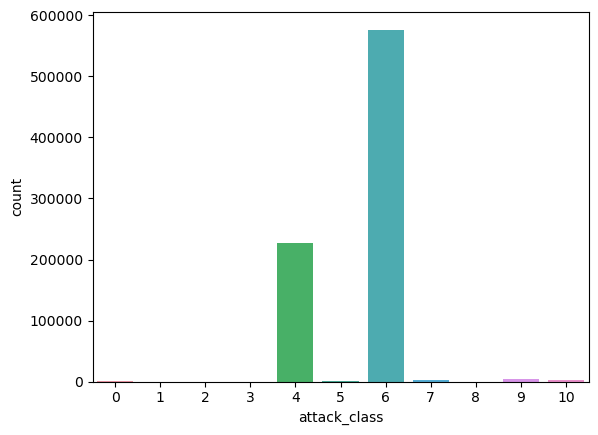

In [229]:
## Graphical Represent of attack_class
sns.countplot(x='attack_class', data=df1)

In [230]:
df1.isna().sum().sum()

0

In [231]:
X = df1.drop(columns = ['attack_class'])
y = df1["attack_class"]

In [232]:
pd.Series(y).value_counts()

6     576710
4     227228
9       5019
10      3007
7       2964
5       1554
0        968
3         53
1         30
8         10
2          8
Name: attack_class, dtype: int64

In [233]:
#balancing the data
#from imblearn.over_sampling import SMOTE
#sm = SMOTE()
#resampled_X, resampled_y = sm.fit_resample(X, y)

In [234]:
#splitting to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [235]:
logreg=LogisticRegression(class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [236]:
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

In [237]:
pd.Series(train_pred).value_counts()

6     298033
4     168707
0      56739
1      32933
9      24143
8      24060
5      18581
2      14630
3       9965
10      3221
7       3028
dtype: int64

In [238]:
test_pred

array([6, 0, 4, ..., 6, 4, 4])

In [239]:
c_matrix_test=metrics.confusion_matrix(y_test, test_pred)
c_matrix_test

array([[  177,     9,     0,     0,     0,     0,     3,     0,     3,
            0,     0],
       [    0,     5,     3,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     9,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     2, 39767,     4,    43,     8,   344,
         5287,   120],
       [    0,     0,    11,     0,     0,   281,     0,     0,     8,
            0,     1],
       [13963,  8381,  3583,  2453,  2503,  4250, 74016,    11,  5718,
          155,   110],
       [    0,     0,     0,     0,     0,     1,     0,   460,    65,
           24,    32],
       [    1,     0,     1,     0,     0,     0,     0,     0,     1,
            0,     0],
       [    1,     0,     2,     0,    17,    53,     9,   269,    21,
          683,    43],
       [    0,     0,     0,     0,    18,     8,     0,    

In [240]:
## Checking accuracy of the model for training and testing data

print("Accuracy score : ", (metrics.accuracy_score(y_train, train_pred)))

Accuracy score :  0.7109519295455935


In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.01      0.93      0.03       776
           1       0.00      0.95      0.00        22
           2       0.00      0.86      0.00         7
           3       0.00      0.95      0.01        44
           4       0.94      0.87      0.91    181653
           5       0.06      0.94      0.12      1253
           6       1.00      0.65      0.78    461567
           7       0.64      0.81      0.72      2382
           8       0.00      0.43      0.00         7
           9       0.10      0.62      0.17      3921
          10       0.67      0.89      0.76      2408

    accuracy                           0.71    654040
   macro avg       0.31      0.81      0.32    654040
weighted avg       0.97      0.71      0.81    654040

              precision    recall  f1-score   support

           0       0.01      0.92      0.02       192
           1       0.00      0.62      0.00         8
           2       0.00 

In [244]:
# checking how much area is under the ROC curve

from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, test_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    test_pred = lb.transform(test_pred)
    return metrics.roc_auc_score(y_test, test_pred, average=average)
auc = multiclass_roc_auc_score(y_test, test_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.8784775040835882


##                                  xxx END xxx